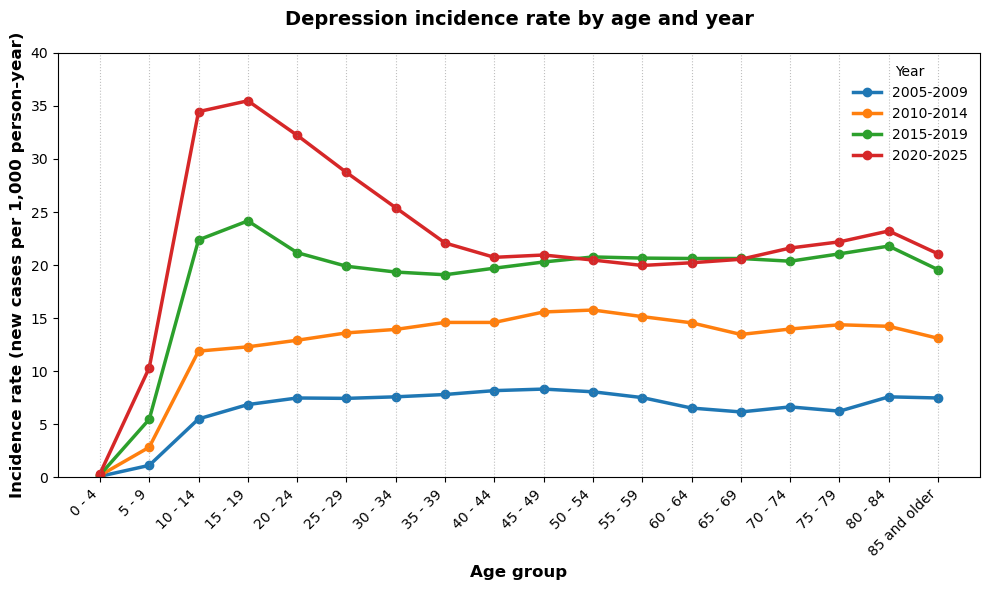

Graph 1: Depression Diagnosis


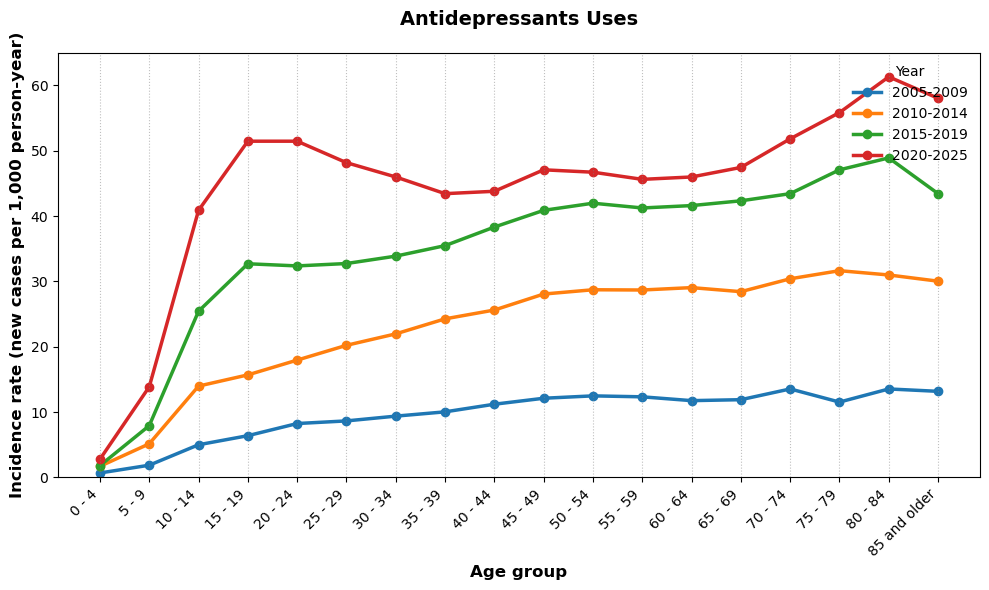

 Graph 2: Antidepressant Uses


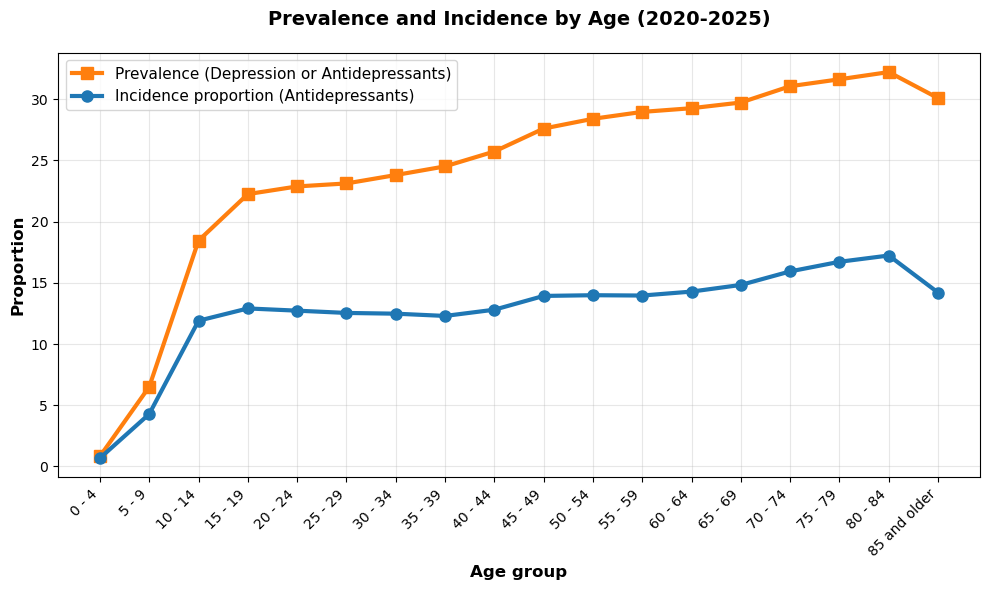


Verifying plotted values (Age 10-14, 2020):
Prevalence (Dep OR AD): 18.5%
Incidence (AD): 11.9%


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_PATH = "Depression.In.Women.csv"
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip()

rename_map = {
    "Time Window": "Year",
    "Age_Strata": "Age",
    "Incidence Proportion (Depression)": "Inc_Dep",
    "Prevalence(Depression)": "Prev_Dep",
    "Incidence Rate (cases/person-day)(Depression)": "Rate_Dep",
    "Incidence Proportion (antidepressant uses)": "Inc_AD",
    "Prevalence (antidepressant uses)": "Prev_AD",
    "Incidence Rate (cases/person-day) (antidepressant uses)": "Rate_AD",
    "Incidence Proportion (Depression or antidepressants)": "Inc_Either",
    "Prevalence (Depression or antidepressants)": "Prev_Either",
    "Incidence Rate (cases/person-day)  (Depression or antidepressants)": "Rate_Either"
}
df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# Order age groups
def age_lower_bound(s: str) -> float:
    s = str(s).strip().lower()
    if "older" in s:
        return 85.0
    s = s.replace(" ", "")
    if "-" in s:
        try:
            return float(s.split("-")[0])
        except Exception:
            return np.nan
    try:
        return float(s)
    except Exception:
        return np.nan

df["AgeKey"] = df["Age"].map(age_lower_bound)

age_order = (
    df[["Age", "AgeKey"]]
    .drop_duplicates()
    .sort_values("AgeKey")
    .loc[:, "Age"]
    .tolist()
)
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

# Per-year 
years = sorted(df["Year"].unique())
df_by_year = {y: df[df["Year"] == y].sort_values("Age") for y in years}

period_labels = {
    2005: "2005-2009",
    2010: "2010-2014", 
    2015: "2015-2019",
    2020: "2020-2025"  # ✅ As she confirmed
}

colors = {2005: '#1f77b4', 2010: '#ff7f0e', 2015: '#2ca02c', 2020: '#d62728'}

# Calculate rates per 1,000 person-years
for y in years:
    df_by_year[y] = df_by_year[y].copy()
    df_by_year[y]["Rate_Dep_per1000py"] = df_by_year[y]["Rate_Dep"] * 365.0 * 1000.0
    df_by_year[y]["Rate_AD_per1000py"] = df_by_year[y]["Rate_AD"] * 365.0 * 1000.0
    df_by_year[y]["Rate_Either_per1000py"] = df_by_year[y]["Rate_Either"] * 365.0 * 1000.0

peak_ages = ["10 - 14", "15 - 19"]
peak_indices = [age_order.index(age) for age in peak_ages if age in age_order]

# Graph 1: Depression Diagnosis
fig, ax = plt.subplots(figsize=(10, 6))

for y in years:
    d = df_by_year[y]
    ax.plot(d["Age"], d["Rate_Dep_per1000py"],
            marker="o", linewidth=2.5, markersize=6,
            label=period_labels[y],
            color=colors[y])

ax.set_xticks(range(len(age_order)))
ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=10)
ax.set_xlabel("Age group", fontsize=12, fontweight='bold')
ax.set_ylabel("Incidence rate (new cases per 1,000 person-year)", 
              fontsize=12, fontweight='bold')
ax.set_title("Depression incidence rate by age and year", 
             fontsize=14, fontweight='bold', pad=20)

ax.legend(title="Year", loc="upper right", frameon=False, fontsize=10)
ax.set_ylim(0, 40)

for i in range(len(age_order)):
    ax.axvline(x=i, color='gray', linestyle=':', linewidth=0.8, alpha=0.5)

plt.tight_layout()
plt.savefig("G1_Depression_Diagnosis_2020-2025.png", dpi=300, bbox_inches='tight')
plt.show()
print("Graph 1: Depression Diagnosis")

# GRAPH 2: Antidepressants Uses  

fig, ax = plt.subplots(figsize=(10, 6))

for y in years:
    d = df_by_year[y]
    ax.plot(d["Age"], d["Rate_AD_per1000py"],
            marker="o", linewidth=2.5, markersize=6,
            label=period_labels[y],
            color=colors[y])

ax.set_xticks(range(len(age_order)))
ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=10)
ax.set_xlabel("Age group", fontsize=12, fontweight='bold')
ax.set_ylabel("Incidence rate (new cases per 1,000 person-year)", 
              fontsize=12, fontweight='bold')
ax.set_title("Antidepressants Uses", 
             fontsize=14, fontweight='bold', pad=20)

ax.legend(title="Year", loc="upper right", frameon=False, fontsize=10)
ax.set_ylim(0, 65)

for i in range(len(age_order)):
    ax.axvline(x=i, color='gray', linestyle=':', linewidth=0.8, alpha=0.5)

plt.tight_layout()
plt.savefig("G2_Antidepressants_Uses_2020-2025.png", dpi=300, bbox_inches='tight')
plt.show()
print(" Graph 2: Antidepressant Uses")

# Graph 3
d = df_by_year[2020]

fig, ax = plt.subplots(figsize=(10, 6))

# Prevalence
ax.plot(d["Age"], d["Prev_Either"] * 100,  # ← Column: "Prevalence (Depression or antidepressants)"
        marker="s", linewidth=3, markersize=8,
        label="Prevalence (Depression or Antidepressants)", 
        color='#ff7f0e')  # Orange

# INcidence
ax.plot(d["Age"], d["Inc_AD"] * 100,  # ← Column: "Incidence Proportion (antidepressant uses)"
        marker="o", linewidth=3, markersize=8,
        label="Incidence proportion (Antidepressants)", 
        color='#1f77b4')  # Blue

ax.set_xticks(range(len(age_order)))
ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=10)
ax.set_xlabel("Age group", fontsize=12, fontweight='bold')
ax.set_ylabel("Proportion", fontsize=12, fontweight='bold')
ax.set_title("Prevalence and Incidence by Age (2020-2025)", 
             fontsize=14, fontweight='bold', pad=20)

ax.legend(loc="upper left", frameon=True, fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("G3_Prevalence_Incidence_Corrected.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nVerifying plotted values (Age 10-14, 2020):")
age_10_14 = d[d["Age"] == "10 - 14"]
print(f"Prevalence (Dep OR AD): {age_10_14['Prev_Either'].values[0]*100:.1f}%")
print(f"Incidence (AD): {age_10_14['Inc_AD'].values[0]*100:.1f}%")

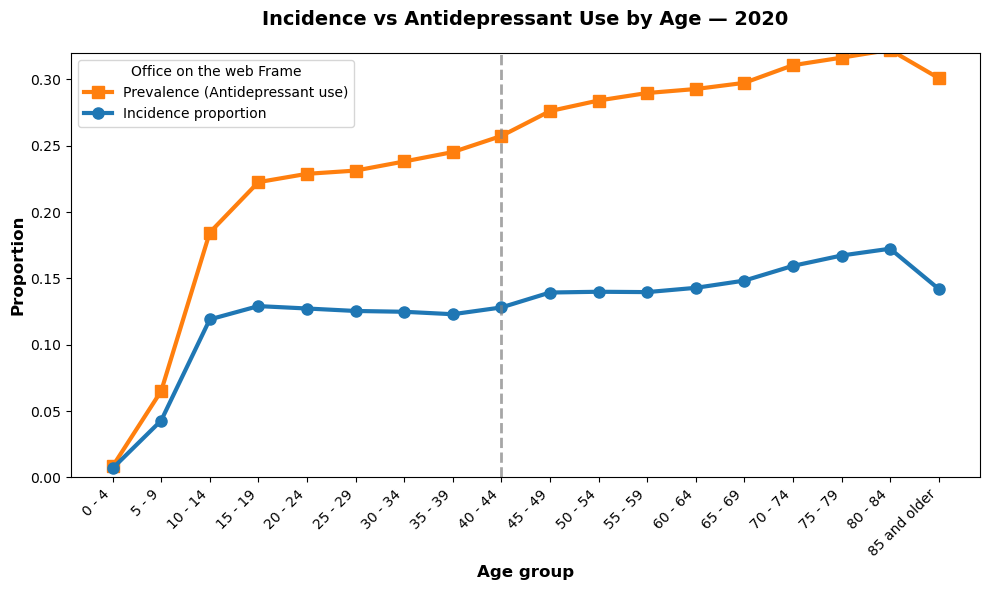

 Graph 3: Prevalence (existing) + Incidence (new), 2020-2025


In [4]:
d = df_by_year[2020]

fig, ax = plt.subplots(figsize=(10, 6))

# Prevalence of Depression OR Antidepressants (existing patients)
ax.plot(d["Age"], d["Prev_Either"], 
        marker="s", linewidth=3, markersize=8,
        label="Prevalence (Antidepressant use)", 
        color='#ff7f0e')  # Orange

# Incidence of Antidepressants (new users)
ax.plot(d["Age"], d["Inc_AD"], 
        marker="o", linewidth=3, markersize=8,
        label="Incidence proportion", 
        color='#1f77b4')  # Blue

# Vertical DAshed line
age40_idx = (d["AgeKey"] - 40).abs().idxmin()
xpos = list(d["Age"]).index(d.loc[age40_idx, "Age"])
ax.axvline(x=xpos, linestyle='--', linewidth=2, color='gray', alpha=0.7)

ax.set_xticks(range(len(age_order)))
ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=10)
ax.set_xlabel("Age group", fontsize=12, fontweight='bold')
ax.set_ylabel("Proportion", fontsize=12, fontweight='bold')
ax.set_title("Incidence vs Antidepressant Use by Age — 2020", 
             fontsize=14, fontweight='bold', pad=20)

ax.legend(loc="upper left", frameon=True, fontsize=10, 
          title="Office on the web Frame")  
ax.set_ylim(0, 0.32)

plt.tight_layout()
plt.savefig("G3_Prevalence_Incidence_2020.png", dpi=300, bbox_inches='tight')
plt.show()
print(" Graph 3: Prevalence (existing) + Incidence (new), 2020-2025")